In [1]:
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# defining autoencoder
encoding_dim = 5
input_img = Input(shape=(784,)) # input 784 = 28*28
encoded = Dense(encoding_dim, activation='relu')(input_img) #encoder layer
decoded = Dense(784, activation='sigmoid')(encoded) # decoder layer
autoencoder = Model(input_img, decoded) # autoencoder

In [3]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 784)               4704      
                                                                 
Total params: 8,629
Trainable params: 8,629
Non-trainable params: 0
_________________________________________________________________


In [4]:
encoder_layer = autoencoder.layers[-2] #  seperate encoder layer

encoder = Model(input_img, encoder_layer(input_img)) # seperate encoder model

encoded_input = Input(shape=(encoding_dim,)) # encoded input for decoder 

decoder_layer = autoencoder.layers[-1] # seperate decoder layer

decoder = Model(encoded_input, decoder_layer(encoded_input)) # seperate decoder layer

In [5]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
Total params: 3,925
Trainable params: 3,925
Non-trainable params: 0
_________________________________________________________________


In [6]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_1 (Dense)             (None, 784)               4704      
                                                                 
Total params: 4,704
Trainable params: 4,704
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
# changing datatype
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# reshape
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # shape = (no of obs , 28*28)
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) # shape = (no of obs ,28*28)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


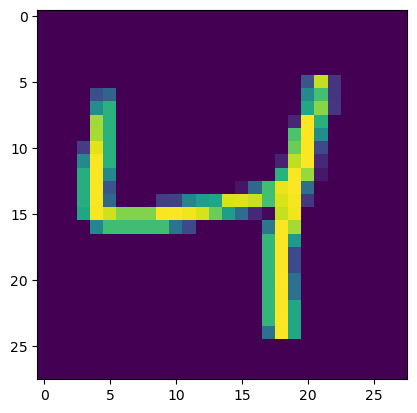

In [10]:
plt.imshow(x_train[2].reshape(28,28))

In [11]:
autoencoder.fit(x_train, x_train, epochs=15, batch_size=256,validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 4s 14ms/step - loss: 0.3525 - val_loss: 0.2658
Epoch 2/15
235/235 [==============================] - 3s 11ms/step - loss: 0.2477 - val_loss: 0.2295
Epoch 3/15
235/235 [==============================] - 2s 9ms/step - loss: 0.2199 - val_loss: 0.2097
Epoch 4/15
235/235 [==============================] - 3s 11ms/step - loss: 0.2080 - val_loss: 0.2039
Epoch 5/15
235/235 [==============================] - 3s 12ms/step - loss: 0.2039 - val_loss: 0.2011
Epoch 6/15
235/235 [==============================] - 2s 10ms/step - loss: 0.2015 - val_loss: 0.1993
Epoch 7/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1998 - val_loss: 0.1978
Epoch 8/15
235/235 [==============================] - 2s 10ms/step - loss: 0.1984 - val_loss: 0.1967
Epoch 9/15
235/235 [==============================] - 2s 9ms/step - loss: 0.1973 - val_loss: 0.1956
Epoch 10/15
235/235 [==============================] - 2s 10ms/step - loss: 0.1963 - val_loss

In [12]:
encoded_img = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


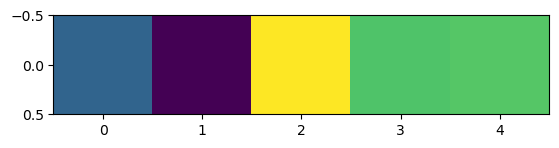

In [13]:
plt.imshow(encoded_img[6].reshape(1,5)) # 1*5 = 5 i.e encoding dim

In [14]:
decoded_img = decoder.predict(encoded_img)

313/313 [==============================] - 1s 2ms/step


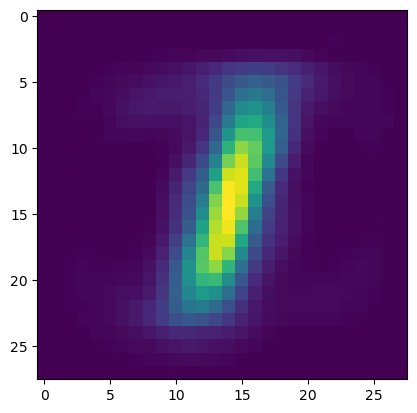

In [15]:
plt.imshow(decoded_img [2].reshape(28,28))

In [16]:
output_image = autoencoder.predict(x_test)

313/313 [==============================] - 1s 4ms/step


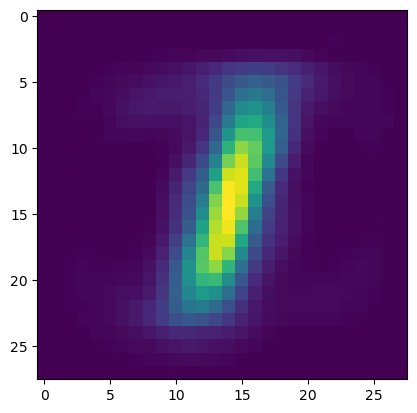

In [17]:
plt.imshow(output_image[2].reshape(28,28))

In [ ]:
from sklearn.preprocessing